In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
# Define the state for the workflow
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi: float

In [3]:
# Define the python functions that will invoked by graph node which access and modify the state
def compute_bmi(state: BMIState) -> BMIState:
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight / (height ** 2)
    state["bmi"] = round(bmi,2)

    return state



In [4]:
# Define graph:
# START ---> compute_bmi ----> END

In [5]:
# Define graph
graph = StateGraph(BMIState)

# Define the nodes of the graph
graph.add_node("compute_BMI", compute_bmi)

# Define the edges
graph.add_edge(START, "compute_BMI")
graph.add_edge("compute_BMI", END)

# Compile the graph
workflow = graph.compile()

In [6]:
initial_state = {
    "weight_kg" : 80,
    "height_m" : 1.73
}

final_state = workflow.invoke(initial_state)

In [7]:
final_state

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}

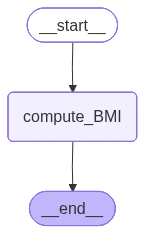

In [8]:
# Visualize the graph

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())